In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2]])
labels = np.array([0,0,0,0,1,1,1,1])

zeroes = np.where(labels==0)
ones = np.where(labels==1)

the perceptron algo:

1. initialize random weights
2. iterate through points
    - if correct: do nothing
    - if incorrect: move line closer to point
3. stop when
    - all points classified correctly
    - or reached predetermined number of iterations
    - or ..

In [125]:
w = np.random.rand(2, )
alpha = 0.01
bias = -4

w_history = [w]
bias_history = [bias]

def predict(bias, w, X):
    res = bias + (w * X).sum()
    if res > 0:
        return 1
    else:
        return 0


for i in range(300):
    idx = np.random.choice(len(features))
    point = features[idx]
    true_label = labels[idx]

    # predict
    predicted = predict(bias, w, point)
    if predicted == true_label:
        pass
    else:
        # adjust w
        if predicted > true_label:
            w = w - features[idx] * alpha
            bias = bias * (1 - alpha)
        else:
            w = w + features[idx] * alpha
            bias = bias * (1 + alpha)
        
        w_history.append(w)
        bias_history.append(bias)

In [126]:
# track changes in weights
changes = []
for w_n1, w_n0 in zip(w_history[1:], w_history):
    c = w_n1 - w_n0
    changes.append(c)

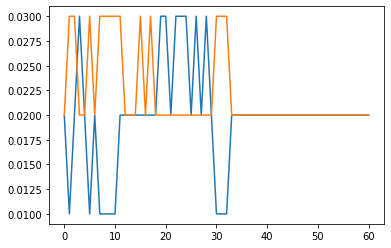

In [127]:
plt.plot(changes)

In [128]:
(w * features).sum(axis=1) + bias

array([-5.90201612, -3.07809649, -3.77133703, -1.64065794,  0.49002115,
       -0.2032194 ,  1.92745969,  1.23421915])

In [134]:
# final predictions
print('final predictions')
print(((bias + (w * features).sum(axis=1)) > 0) * 1)

print('ground truth')
print(labels)

# final weights and bias
print()
print(w_history[-1])
print(bias_history[-1])


final predictions
[0 0 0 0 1 0 1 1]
ground truth
[0 0 0 0 1 1 1 1]

[1.43743854 2.13067909]
-7.339454662198933


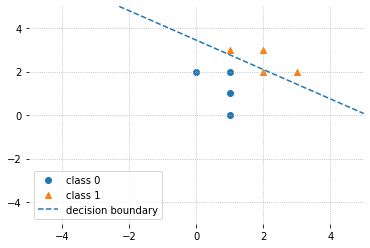

In [147]:
# plot decision boundary
w1, w2 = w_history[-1]
bias_ = bias_history[-1]

slope = -(bias_/w2)/(bias_/w1)
intercept = -bias_/w2

fig, ax = plt.subplots()

# plot 0s
ax.scatter(features[zeroes][:,0], features[zeroes][:,1], marker='o', label='class 0')
ax.scatter(features[ones][:,0], features[ones][:,1], marker='^', label='class 1')


ax.axline((0, intercept), slope=slope, ls='--', label='decision boundary')

ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)

for spine in ['top', 'bottom', 'left', 'right']:
    ax.spines[spine].set_visible(False)
ax.grid(ls=':')
ax.legend()